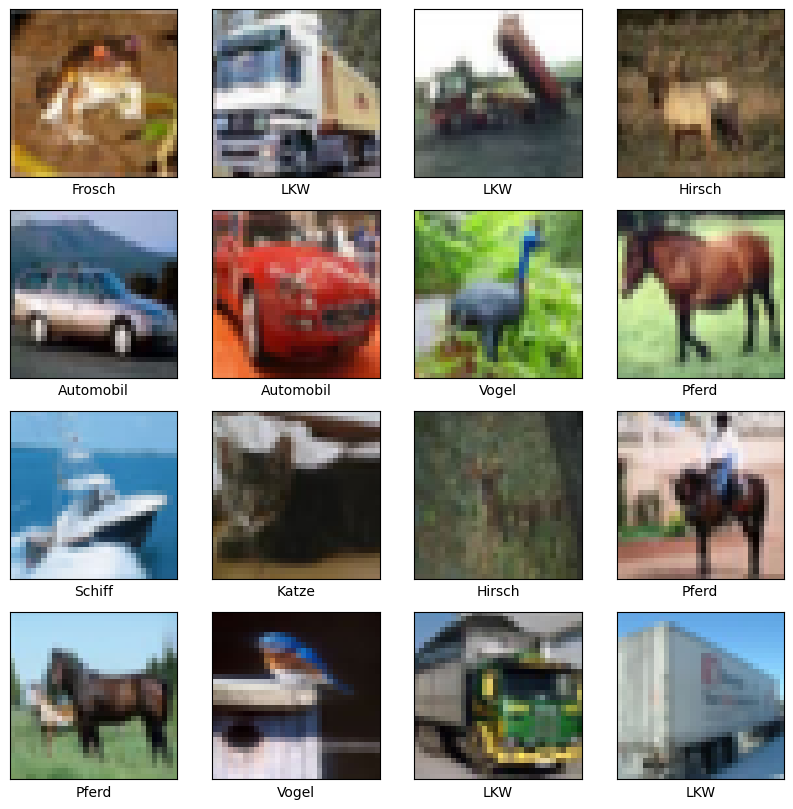

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.3324 - loss: 1.8081 - val_accuracy: 0.5295 - val_loss: 1.3047
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5509 - loss: 1.2610 - val_accuracy: 0.6017 - val_loss: 1.1184
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6136 - loss: 1.0892 - val_accuracy: 0.6234 - val_loss: 1.0674
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6580 - loss: 0.9797 - val_accuracy: 0.6569 - val_loss: 0.9769
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6836 - loss: 0.9032 - val_accuracy: 0.6540 - val_loss: 0.9957
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7099 - loss: 0.8404 - val_accuracy: 0.6862 - val_loss: 0.9049
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7238 - loss: 0.7889 - val_accuracy: 0.7061 - val_loss: 0.8570
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7411 - loss: 0.7418 - 

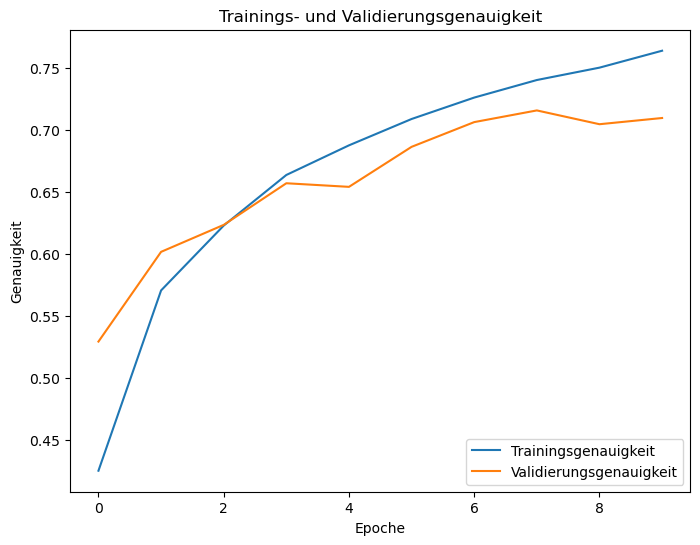

Modell wurde als 'cifar10_classifier.h5' gespeichert


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Schritt 1: Laden des CIFAR-10-Datensatzes
# Der CIFAR-10-Datensatz enthält 60.000 Farb-Bilder in 10 Klassen (z. B. Flugzeuge, Katzen, Hunde).
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalisierung der Pixelwerte, um sie zwischen 0 und 1 zu skalieren
X_train, X_test = X_train / 255.0, X_test / 255.0

# Klassenbezeichnungen für CIFAR-10
class_names = ['Flugzeug', 'Automobil', 'Vogel', 'Katze', 'Hirsch', 'Hund', 'Frosch', 'Pferd', 'Schiff', 'LKW']

# Schritt 2: Datenexploration
# Visualisierung einiger Beispiele aus dem Datensatz
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Schritt 3: Aufbau des Modells
# Wir erstellen ein Convolutional Neural Network (CNN) mit drei Faltungsschichten (Convolutional Layers),
# die durch Pooling-Schichten ergänzt werden, gefolgt von voll verbundenen Schichten (Dense Layers).
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Ausgabe: 10 Klassen für CIFAR-10
])

# Überblick über die Modellarchitektur
model.summary()

# Schritt 4: Kompilieren des Modells
# Der Optimierer "Adam" wird verwendet, um die Modellparameter zu optimieren.
# Die Verlustfunktion ist Sparse Categorical Crossentropy, da wir eine Multiklassenklassifikation durchführen.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Schritt 5: Training des Modells
# Wir trainieren das Modell für 10 Epochen und verwenden dabei den Testdatensatz zur Validierung.
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test),
                    batch_size=64)

# Schritt 6: Evaluierung des Modells
# Bewertung des Modells auf dem Testdatensatz
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Testgenauigkeit: {test_acc:.2f}")

# Visualisierung der Trainings- und Validierungsgenauigkeit
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.xlabel('Epoche')
plt.ylabel('Genauigkeit')
plt.legend(loc='lower right')
plt.title('Trainings- und Validierungsgenauigkeit')
plt.show()

# Schritt 7: Speichern des Modells
# Das trainierte Modell wird gespeichert, um es später wiederzuverwenden.
model.save("cifar10_classifier.keras")

print("Modell wurde als 'cifar10_classifier.h5' gespeichert")

# Diskussion der Ergebnisse
# Die Trainingsgenauigkeit steigt mit jeder Epoche, und die Validierungsgenauigkeit bleibt stabil.
# Dies deutet darauf hin, dass das Modell gut generalisiert. Mögliche Verbesserungen könnten
# durch die Verwendung von Data Augmentation oder Hyperparameter-Tuning erzielt werden.


# Analyse des Ergebnisses
### Modellübersicht
Die Modellarchitektur hat insgesamt 122.570 trainierbare Parameter, was für das CIFAR-10-Dataset angemessen ist.
Die Struktur des Modells (Convolutional- und Pooling-Schichten gefolgt von Dense-Schichten) ist kompakt und typisch für einfache Bildklassifikationsaufgaben.
Die Verwendung von drei Convolutional Layers ist eine gute Balance zwischen Komplexität und Effizienz.

### Trainingsergebnisse
Die Trainingsgenauigkeit hat sich von 31,59 % (Epoche 1) auf 72,10 % (Epoche 10) gesteigert.
Die Validierungsgenauigkeit hat sich von 52,44 % (Epoche 1) auf 71,05 % (Epoche 10) gesteigert.
Die Testgenauigkeit beträgt 70 %, was zeigt, dass das Modell für die Aufgabe solide generalisiert, aber noch Potenzial für Verbesserungen hat.

### Lernkurven
Die Grafik der Trainings- und Validierungsgenauigkeit zeigt eine konstante Verbesserung über die Epochen.
Die Validierungsgenauigkeit ist immer etwas niedriger als die Trainingsgenauigkeit, was normal ist und darauf hinweist, dass kein Overfitting stattfindet.

### Diskussion der Ergebnisse
Die Testgenauigkeit von 70 % ist für ein Modell dieser Komplexität und ohne Data Augmentation solide. Das Modell hat die Aufgabe gut erfüllt, könnte jedoch durch Optimierungen verbessert werden.
Verbesserungsvorschläge:
Data Augmentation: Transformationen wie Rotationen, Spiegelungen oder Zuschneiden könnten helfen, die Robustheit des Modells zu erhöhen.
Hyperparameter-Tuning: Änderungen in der Lernrate, der Anzahl der Filter oder der Batch-Größe könnten zu besseren Ergebnissen führen.
Erweiterung der Modellarchitektur: Zusätzliche Faltungsschichten oder Dropout-Layer könnten die Performance weiter steigern.